## РК_1 Федотов Александр ИУ5-64Б

Вариант 12
задание № 2 
датасет № 4


содержание датасета

1. age - возраст
2. sex - пол
3. chest pain type - тип боли в груди
4. resting blood pressure - артериальное давление в покое
5. serum cholestoral in mg/dl - холестерин в сыворотке крови в мг/дл
6. fasting blood sugar > 120 mg/dl - уровень сахара в крови натощак > 120 мг/дл
7. resting electrocardiographic results (values 0,1,2) - результаты электрокардиографии в состоянии покоя (значения 0,1,2)
8. maximum heart rate achieved - достигнутая максимальная частота сердечных сокращений
9. exercise induced angina - стенокардия, вызванная физической нагрузкой
10. oldpeak = ST depression induced by exercise relative to rest - депрессия сегмента ST, вызванная физической нагрузкой по 
11. the slope of the peak exercise ST segment - наклон сегмента ST пика физической нагрузки
12. number of major vessels (0-3) colored by flourosopy - количество крупных сосудов (0-3), окрашенных при флоуроскопии
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect - тал: 0 = норма; 1 = фиксированный дефект; 2 = обратимый дефект

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [91]:
data = pd.read_csv('heart.csv', sep = ',')

In [92]:
data.isnull().sum()

age          0
sex          0
cp          53
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     30
slope        0
ca           0
thal         0
target       1
dtype: int64

In [93]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0,1,168,0,1.0,2,2,3,0.0
1,53,1,0.0,140,203,1,0,155,1,3.1,0,0,3,0.0
2,70,1,0.0,145,174,0,1,125,1,2.6,0,0,3,0.0
3,61,1,0.0,148,203,0,1,161,0,0.0,2,1,3,0.0
4,62,0,0.0,138,294,1,1,106,0,1.9,1,3,2,0.0


Заполнил пропуски категориального признака самым часто встречающимся значением

In [94]:
hi_data = data[['cp']]
hi_data_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
hi_data = hi_data_imputer.fit_transform(hi_data)
data[['cp']] = hi_data
data.isnull().sum()

D:\education\PONIRS\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     30
slope        0
ca           0
thal         0
target       1
dtype: int64

Заполним пропуски количественных признаков средним значением

In [95]:
data.oldpeak.fillna(0.8, inplace = True)
data[['oldpeak']] = temp_data

In [97]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      1
dtype: int64

<AxesSubplot:xlabel='age'>

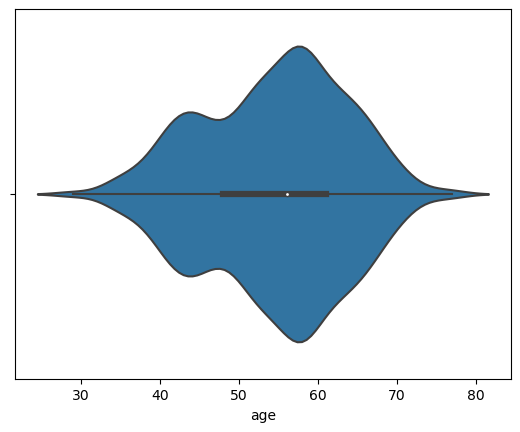

In [101]:
sns.violinplot(x=data['age'])

Для дальнейего анализа считаю целесообразным использовать все имеющиеся данные для более корректного анализа и исключать какие либо данные лишь при более конкретном погружению в желаемую тему исследования